In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from statistics import mean
import seaborn as sns

In [ ]:
weather_df = pd.read_csv("/content/sample_data/JFK.csv", index_col="DATE")


In [ ]:
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WESD
DATE,,,,,,,,,,,
1/1/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.28,0.0,0.0,NaN,45.0,33.0,NaN,NaN
1/2/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.87,0.00,0.0,0.0,NaN,42.0,28.0,NaN,NaN
1/3/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,NaN,48.0,28.0,NaN,NaN
1/4/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,NaN,51.0,31.0,NaN,NaN
1/5/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,NaN,47.0,35.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4/5/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,44.0,50.0,38.0,NaN,NaN
4/6/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,46.0,55.0,42.0,NaN,NaN
4/7/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,48.0,58.0,41.0,NaN,NaN


***Data Cleaning:***

In [ ]:
# Calculating the total number of null values in the weather dataset for JFK Airport, NEW YORK

weather_df.apply(pd.isnull).sum()

STATION        0
NAME           0
AWND           3
PRCP           1
SNOW           1
SNWD           3
TAVG        5818
TMAX           1
TMIN           1
TSUN       12489
WESD        6641
dtype: int64

In [ ]:
# Calculating the percentage of missing values in each column

null_percent= weather_df.apply(pd.isnull).sum()/weather_df.shape[0]
null_percent

STATION    0.000000
NAME       0.000000
AWND       0.000240
PRCP       0.000080
SNOW       0.000080
SNWD       0.000240
TAVG       0.464771
TMAX       0.000080
TMIN       0.000080
TSUN       0.997683
WESD       0.530516
dtype: float64

In [ ]:
# Selecting columns whose missing values are less than 5%

valid_columns = weather_df.columns[null_percent < 0.05]
valid_columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
# Selecting the valid columns only

weather_df = weather_df[valid_columns].copy()
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,,
1/1/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.28,0.0,0.0,45.0,33.0
1/2/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.87,0.00,0.0,0.0,42.0,28.0
1/3/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,48.0,28.0
1/4/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,51.0,31.0
1/5/1990,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,47.0,35.0
...,...,...,...,...,...,...,...,...
4/5/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,50.0,38.0
4/6/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,55.0,42.0
4/7/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,58.0,41.0


In [ ]:
weather_df.apply(pd.isnull).sum()

STATION    0
NAME       0
AWND       3
PRCP       1
SNOW       1
SNWD       3
TMAX       1
TMIN       1
dtype: int64

In [ ]:
 # Filling the mssing values with linear interpolation

weather_df = weather_df.fillna({'AWND':weather_df['AWND'].interpolate(method='linear') })
weather_df = weather_df.fillna({'PRCP':weather_df['PRCP'].interpolate(method='linear') })
weather_df = weather_df.fillna({'TMAX':weather_df['TMAX'].interpolate(method='linear') })
weather_df = weather_df.fillna({'TMIN':weather_df['TMIN'].interpolate(method='linear') })
weather_df = weather_df.fillna({'SNOW':weather_df['SNOW'].interpolate(method='linear') })
weather_df = weather_df.fillna({'SNWD':weather_df['SNWD'].interpolate(method='linear') })

In [ ]:
# Checking for missing values again
weather_df.apply(pd.isnull).sum()

STATION    0
NAME       0
AWND       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
dtype: int64

In [ ]:
weather_df.dtypes

STATION     object
NAME        object
AWND       float64
PRCP       float64
SNOW       float64
SNWD       float64
TMAX       float64
TMIN       float64
dtype: object

In [ ]:
weather_df.index

Index(['1/1/1990', '1/2/1990', '1/3/1990', '1/4/1990', '1/5/1990', '1/6/1990',
       '1/7/1990', '1/8/1990', '1/9/1990', '1/10/1990',
       ...
       '3/31/2024', '4/1/2024', '4/2/2024', '4/3/2024', '4/4/2024', '4/5/2024',
       '4/6/2024', '4/7/2024', '4/8/2024', '4/9/2024'],
      dtype='object', name='DATE', length=12518)

In [ ]:
# Converting index to date time

weather_df.index = pd.to_datetime(weather_df.index)
weather_df.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07',
               '2024-04-08', '2024-04-09'],
              dtype='datetime64[ns]', name='DATE', length=12518, freq=None)

In [ ]:
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,,
1990-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.28,0.0,0.0,45.0,33.0
1990-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.87,0.00,0.0,0.0,42.0,28.0
1990-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,48.0,28.0
1990-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,51.0,31.0
1990-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,47.0,35.0
...,...,...,...,...,...,...,...,...
2024-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,50.0,38.0
2024-04-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,55.0,42.0
2024-04-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,58.0,41.0


In [ ]:
# Checking if there is any gap in the data

weather_df.index.year.value_counts().sort_index()

DATE
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    100
Name: count, dtype: int64

In [ ]:
# Setting the target column in weather dataset which is Tmax

weather_df['target']=weather_df.shift(-1)['TMAX']
weather_df


,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,,,,
1990-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.28,0.0,0.0,45.0,33.0,42.0
1990-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.87,0.00,0.0,0.0,42.0,28.0,48.0
1990-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,48.0,28.0,51.0
1990-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,51.0,31.0,47.0
1990-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,47.0,35.0,45.0
...,...,...,...,...,...,...,...,...,...
2024-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,50.0,38.0,55.0
2024-04-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,55.0,42.0,58.0
2024-04-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,58.0,41.0,63.0


In [ ]:
# Filling the last Nan
weather_df=weather_df.ffill()

In [ ]:
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,,,,
1990-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.28,0.0,0.0,45.0,33.0,42.0
1990-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.87,0.00,0.0,0.0,42.0,28.0,48.0
1990-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,48.0,28.0,51.0
1990-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,51.0,31.0,47.0
1990-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,47.0,35.0,45.0
...,...,...,...,...,...,...,...,...,...
2024-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,50.0,38.0,55.0
2024-04-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,55.0,42.0,58.0
2024-04-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,58.0,41.0,63.0


***Data Visualization***

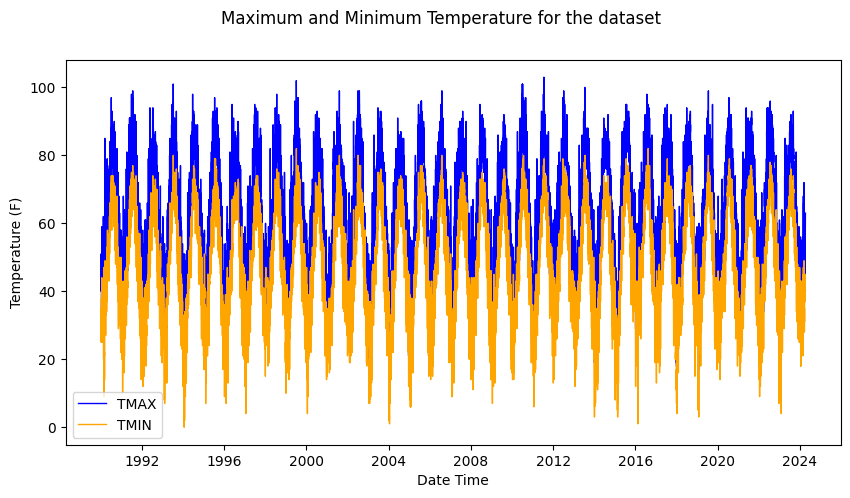

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting minimum and maximum temperature to check noisy data

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Maximum and Minimum Temperature for the dataset',fontsize=12)

ax.plot(weather_df['TMAX'], linewidth=1.0, color = 'Blue', label = "TMAX")
ax.plot(weather_df['TMIN'], linewidth=1.0, color = 'Orange', label = "TMIN")

ax.legend()

ax.set( xlabel="Date Time",
        ylabel="Temperature (F)")

plt.show()
plt.tight_layout()

In [ ]:
# Filter out non-numeric columns
numeric_df = weather_df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,target
AWND,1.000000,0.110951,0.141952,0.062017,-0.260188,-0.261918,-0.313045
PRCP,0.110951,1.000000,0.157151,0.002603,-0.011222,0.051534,-0.004755
SNOW,0.141952,0.157151,1.000000,0.231953,-0.173124,-0.156828,-0.171286
SNWD,0.062017,0.002603,0.231953,1.000000,-0.264382,-0.257818,-0.242586
TMAX,-0.260188,-0.011222,-0.173124,-0.264382,1.000000,0.954165,0.913966
TMIN,-0.261918,0.051534,-0.156828,-0.257818,0.954165,1.000000,0.913375
target,-0.313045,-0.004755,-0.171286,-0.242586,0.913966,0.913375,1.000000


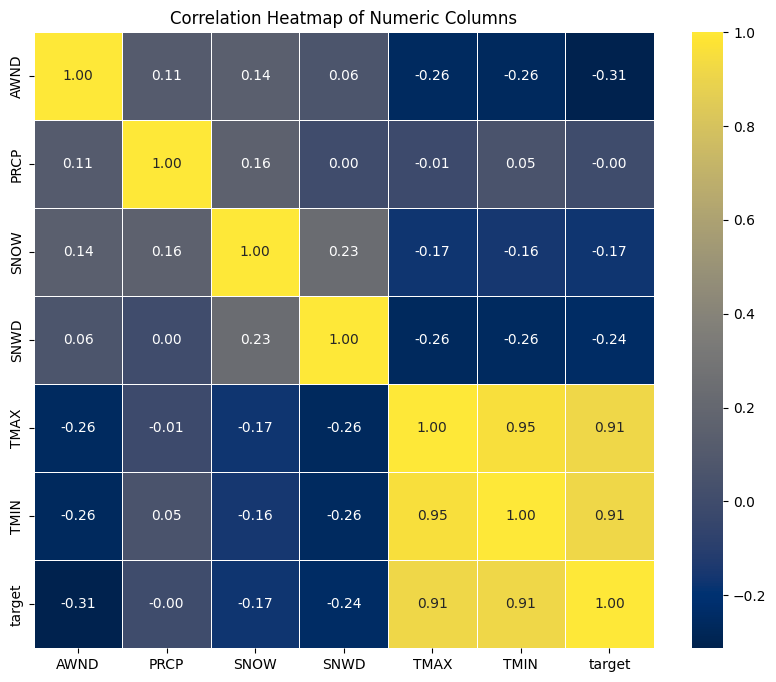

In [ ]:
# Filter out non-numeric columns
numeric_df = weather_df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=('cividis'), fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

***Functions for Linear Regression Models:***

In [ ]:
from sklearn.linear_model import Ridge
model_1 = Ridge(alpha=0.1)

def ridge_predictor(weather_df, model, predictors, start=7667, step=90):

    all_predictions=[]

    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]

        model_1.fit(train[predictors], train['target'])

        preds = model_1.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test['target'], preds], axis=1)

        combined.columns=["actual", "prediction"]

        combined["difference"] = (combined["actual"]-combined["prediction"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [ ]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()

def linear_predictor(weather_df, model, predictors, start=7667, step=90):

    all_predictions=[]

    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]

        model_2.fit(train[predictors], train['target'])

        preds = model_2.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test['target'], preds], axis=1)

        combined.columns=["actual", "prediction"]

        combined["difference"] = (combined["actual"]-combined["prediction"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [ ]:
from sklearn.linear_model import Lasso
model_3 = Lasso(alpha=0.1)

def lasso_predictor(weather_df, model, predictors, start=7667, step=90):

    all_predictions=[]

    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]

        model_3.fit(train[predictors], train['target'])

        preds = model_3.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test['target'], preds], axis=1)

        combined.columns=["actual", "prediction"]

        combined["difference"] = (combined["actual"]-combined["prediction"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions)

***Functions for data visualization after getting predictions:***

In [ ]:
def lineplot(df):

    fig, ax = plt.subplots(figsize=(10,5))
    fig.suptitle('Actual vs Predicted values',fontsize=12)

    ax.plot(df['actual'],  linewidth=2.0,label = "Actual")
    ax.plot(df['prediction'], color = 'Orange', linewidth=2.0, label = "Predicted")

    ax.legend()

    ax.set( xlabel="Date Time",
            ylabel=" Maximum Temperature (F)")

    plt.show()
    plt.tight_layout()

In [ ]:
def violinplot(df):
    fig, ax = plt.subplots(figsize=(5,5))
    fig.suptitle('Violin plot for actual vs predicted values',fontsize=12)
    ax.set( ylabel=" Maximum Temperature (F)")
    sns.violinplot(df[["actual","prediction"]])

In [ ]:
def errorgraph(df):
    fig, ax = plt.subplots(figsize=(10,5))
    fig.suptitle('Error graph',fontsize=12)

    ax.plot(df["difference"].round().value_counts().sort_index(), linewidth=1.0)

    ax.set( xlabel="Error in prediction",
            ylabel="Count of values")

    plt.show()
    plt.tight_layout()

***Functions for calculating errors and accuracy of the model:***

In [ ]:
def rmse_error(actual, predicted):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    mse= mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    return rmse

In [ ]:
def r2_error(actual, predicted):
    from sklearn.metrics import r2_score
    r2 = r2_score(actual, predicted)
    return r2

In [ ]:
def mab_error(actual, predicted):
    from sklearn.metrics import mean_absolute_error as mae
    error = mae(actual, predicted)
    return error

***Ridge Regression - Model 1: ( 'AWND', 'PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD')***

In [ ]:
# Generating columns as predictors for model

predictors_1 = weather_df.columns[~weather_df.columns.isin(["target","STATION","NAME"])]
predictors_1

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
# Calling the ride_predictor function to get the predicted values

predictions_1 = ridge_predictor(weather_df, model_1, predictors_1)
predictions_1

,actual,prediction,difference
DATE,,,
2010-12-29,39.0,42.283180,3.283180
2010-12-30,40.0,40.109013,0.109013
2010-12-31,43.0,44.797551,1.797551
2011-01-01,49.0,47.643529,1.356471
2011-01-02,36.0,51.470502,15.470502
...,...,...,...
2024-04-05,55.0,51.024758,3.975242
2024-04-06,58.0,54.627277,3.372723
2024-04-07,63.0,56.619874,6.380126


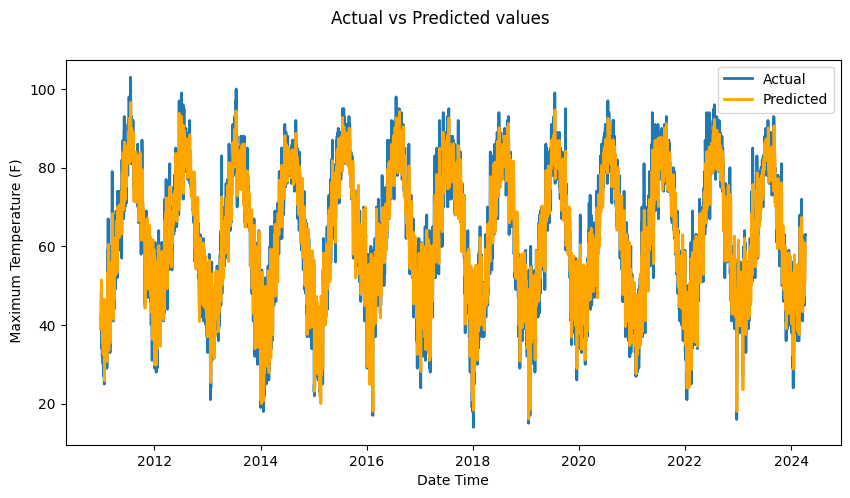

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(predictions_1) # calling lineplot() function created

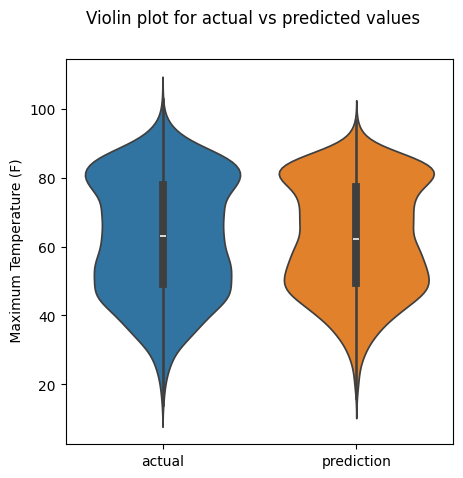

In [ ]:
violinplot(predictions_1) # calling violinplot() function created

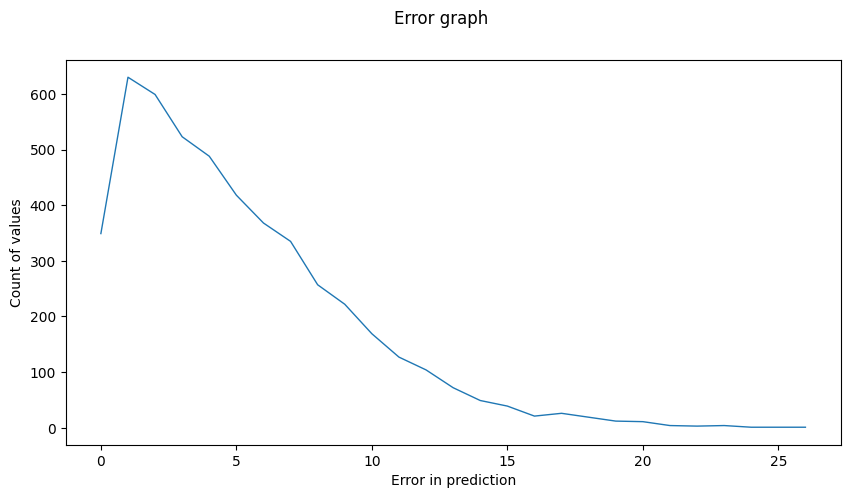

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(predictions_1)

In [ ]:
error = rmse_error(predictions_1['actual'],predictions_1['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.4552839181122685


In [ ]:
error = r2_error(predictions_1['actual'],predictions_1['prediction'])
print("R2 score error : ", error)

R2 score error :  0.8594138660565824


In [ ]:
error = mab_error(predictions_1['actual'],predictions_1['prediction'])
print("Mean absolute error : ", error)

Mean absolute error :  5.048936779082126


***Rolling mean function add columns to improve accuracy: ***

In [ ]:
# rolling() function calculates the rolling mean for the number of days mentioned

def rolling(weather_df, days, col):
    new_col = f"Rolling_{days}_{col}"
    weather_df[new_col] = weather_df[col].rolling(days).mean()
    return weather_df

rolling_days = [5,15]

for days in rolling_days:
    for col in ["PRCP","TMAX","TMIN"]:
        weather_df = rolling(weather_df, days, col)

In [ ]:
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,target,Rolling_5_PRCP,Rolling_5_TMAX,Rolling_5_TMIN,Rolling_15_PRCP,Rolling_15_TMAX,Rolling_15_TMIN
DATE,,,,,,,,,,,,,,,
1990-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.28,0.0,0.0,45.0,33.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.87,0.00,0.0,0.0,42.0,28.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,48.0,28.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.17,0.00,0.0,0.0,51.0,31.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,47.0,35.0,45.0,0.056,46.6,31.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,50.0,38.0,55.0,0.492,49.6,40.4,0.445333,51.133333,38.666667
2024-04-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,55.0,42.0,58.0,0.490,50.0,40.0,0.445333,52.066667,39.600000
2024-04-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,58.0,41.0,63.0,0.286,52.0,39.8,0.236667,52.466667,40.000000


In [ ]:
# Starting values have Nan since it does not have past values to take rolling mean, So we need to cut out the first 15 rows

weather_df = weather_df.iloc[15:,:]

In [ ]:
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,target,Rolling_5_PRCP,Rolling_5_TMAX,Rolling_5_TMIN,Rolling_15_PRCP,Rolling_15_TMAX,Rolling_15_TMIN
DATE,,,,,,,,,,,,,,,
1990-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.05,0.00,0.0,0.0,51.0,33.0,51.0,0.020,41.2,29.8,0.085333,43.666667,31.066667
1990-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.62,0.00,0.0,0.0,51.0,37.0,59.0,0.020,42.8,30.8,0.085333,44.266667,31.666667
1990-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",11.41,0.00,0.0,0.0,59.0,44.0,46.0,0.020,47.8,34.6,0.085333,45.000000,32.733333
1990-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.09,0.00,0.0,0.0,46.0,28.0,37.0,0.020,49.6,35.2,0.085333,44.666667,32.533333
1990-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.46,0.6,0.0,37.0,29.0,37.0,0.092,48.8,34.2,0.116000,44.000000,32.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,50.0,38.0,55.0,0.492,49.6,40.4,0.445333,51.133333,38.666667
2024-04-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,55.0,42.0,58.0,0.490,50.0,40.0,0.445333,52.066667,39.600000
2024-04-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,58.0,41.0,63.0,0.286,52.0,39.8,0.236667,52.466667,40.000000


In [ ]:
weather_df.isna().sum()

STATION            0
NAME               0
AWND               0
PRCP               0
SNOW               0
SNWD               0
TMAX               0
TMIN               0
target             0
Rolling_5_PRCP     0
Rolling_5_TMAX     0
Rolling_5_TMIN     0
Rolling_15_PRCP    0
Rolling_15_TMAX    0
Rolling_15_TMIN    0
dtype: int64

In [ ]:
weather_df.columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN',
       'target', 'Rolling_5_PRCP', 'Rolling_5_TMAX', 'Rolling_5_TMIN',
       'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN'],
      dtype='object')

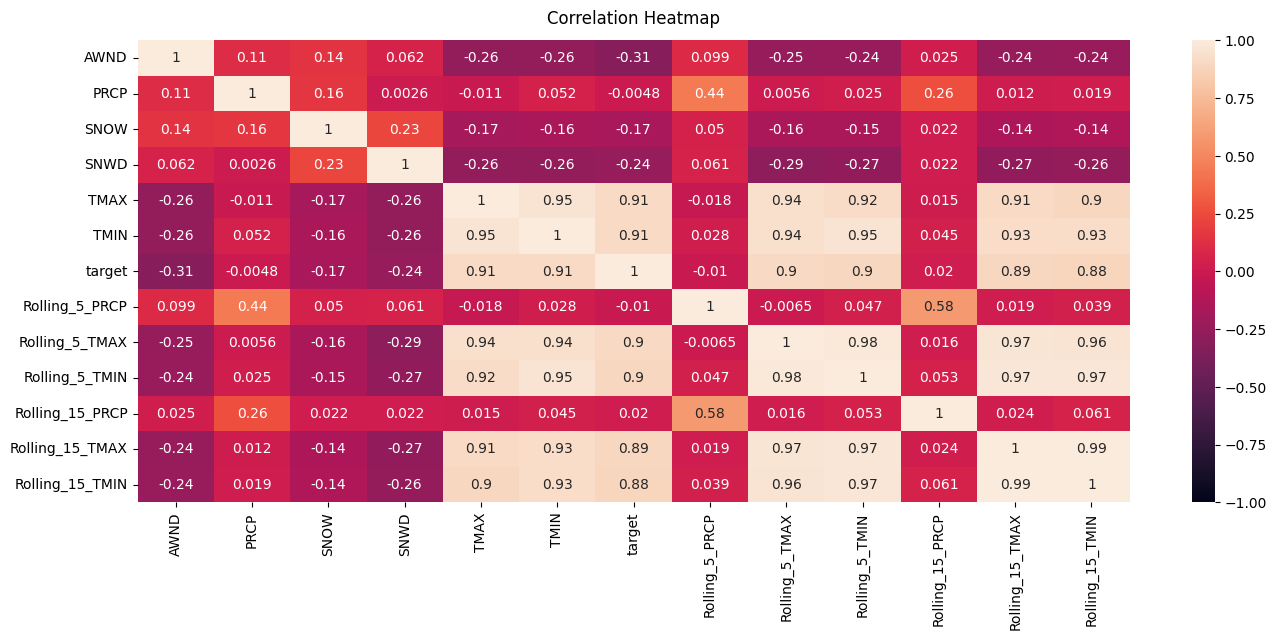

In [ ]:
# Data Visualization (Correlation heatmap)

numeric_df = weather_df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

**Ridge Regression - Model 2 :**

('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN')

In [ ]:
predictors_2 = weather_df.columns[~weather_df.columns.isin(["target","STATION","NAME"])]
predictors_2

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'Rolling_5_PRCP',
       'Rolling_5_TMAX', 'Rolling_5_TMIN', 'Rolling_15_PRCP',
       'Rolling_15_TMAX', 'Rolling_15_TMIN'],
      dtype='object')

In [ ]:
predictions_2 = ridge_predictor(weather_df, model_1, predictors_2)
predictions_2

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,33.180836,3.180836
2011-01-14,36.0,33.447789,2.552211
2011-01-15,36.0,36.972701,0.972701
2011-01-16,27.0,38.257268,11.257268
2011-01-17,45.0,33.158763,11.841237
...,...,...,...
2024-04-05,55.0,50.172123,4.827877
2024-04-06,58.0,53.011420,4.988580
2024-04-07,63.0,54.988925,8.011075


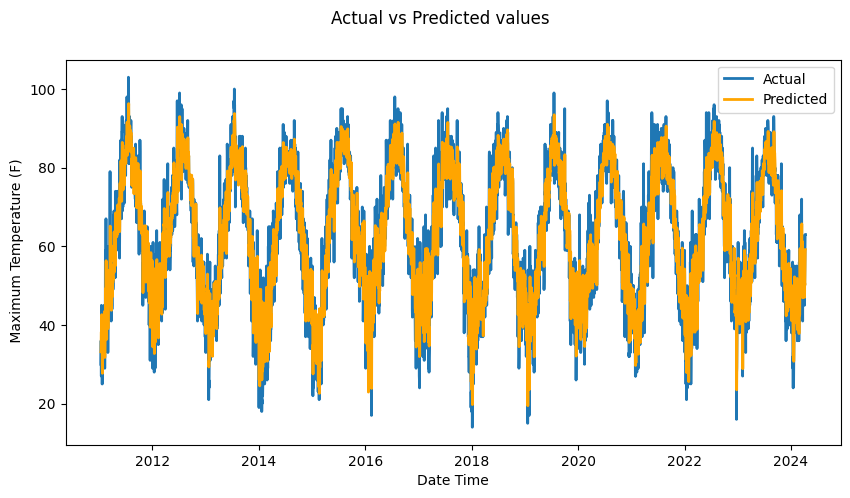

<Figure size 640x480 with 0 Axes>

In [ ]:

lineplot(predictions_2)

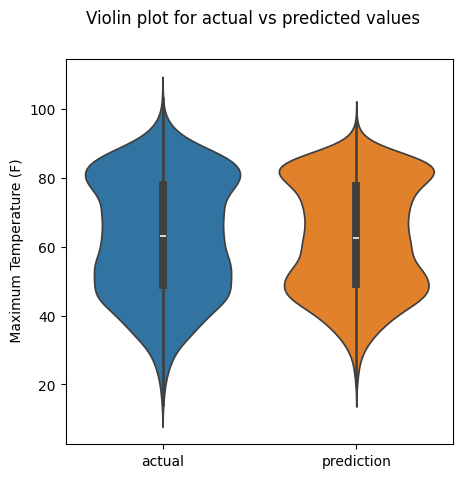

In [ ]:
violinplot(predictions_2)

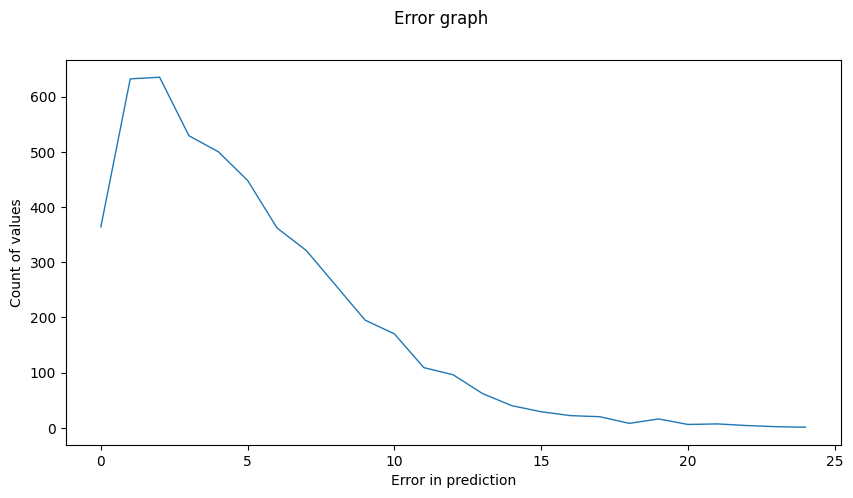

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(predictions_2)

In [ ]:
error = rmse_error(predictions_2['actual'],predictions_2['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.193588916432599


In [ ]:
error = r2_error(predictions_2['actual'],predictions_2['prediction'])
print("R2 score  : ", error)

R2 score  :  0.870035792274554


In [ ]:
error = mab_error(predictions_2['actual'],predictions_2['prediction'])
print("Mean absolute error : ", error)

Mean absolute error :  4.8418000084097965


Expanding mean function to add more columns

In [ ]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["PRCP", "TMAX", "TMIN"]:
    weather_df [f"Month_Avg_{col}"] = weather_df[col].groupby(weather_df.index.month, group_keys= False).apply(expand_mean)
    weather_df [f"Day_Avg_{col}"] = weather_df[col].groupby(weather_df.index.day_of_year, group_keys= False).apply(expand_mean)

<ipython-input-44-87ac9a56c914>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df [f"Month_Avg_{col}"] = weather_df[col].groupby(weather_df.index.month, group_keys= False).apply(expand_mean)
<ipython-input-44-87ac9a56c914>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df [f"Day_Avg_{col}"] = weather_df[col].groupby(weather_df.index.day_of_year, group_keys= False).apply(expand_mean)
<ipython-input-44-87ac9a56c914>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,target,Rolling_5_PRCP,...,Rolling_5_TMIN,Rolling_15_PRCP,Rolling_15_TMAX,Rolling_15_TMIN,Month_Avg_PRCP,Day_Avg_PRCP,Month_Avg_TMAX,Day_Avg_TMAX,Month_Avg_TMIN,Day_Avg_TMIN
DATE,,,,,,,,,,,,,,,,,,,,,
1990-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.05,0.00,0.0,0.0,51.0,33.0,51.0,0.020,...,29.8,0.085333,43.666667,31.066667,0.000000,0.000000,51.000000,51.000000,33.000000,33.000000
1990-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",9.62,0.00,0.0,0.0,51.0,37.0,59.0,0.020,...,30.8,0.085333,44.266667,31.666667,0.000000,0.000000,51.000000,51.000000,35.000000,37.000000
1990-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",11.41,0.00,0.0,0.0,59.0,44.0,46.0,0.020,...,34.6,0.085333,45.000000,32.733333,0.000000,0.000000,53.666667,59.000000,38.000000,44.000000
1990-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.09,0.00,0.0,0.0,46.0,28.0,37.0,0.020,...,35.2,0.085333,44.666667,32.533333,0.000000,0.000000,51.750000,46.000000,35.500000,28.000000
1990-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.46,0.6,0.0,37.0,29.0,37.0,0.092,...,34.2,0.116000,44.000000,32.133333,0.092000,0.460000,48.800000,37.000000,34.200000,29.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.21,0.00,0.0,0.0,50.0,38.0,55.0,0.492,...,40.4,0.445333,51.133333,38.666667,0.122273,0.085143,59.290732,55.428571,43.469268,39.742857
2024-04-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.00,0.0,0.0,55.0,42.0,58.0,0.490,...,40.0,0.445333,52.066667,39.600000,0.122154,0.068857,59.286550,57.142857,43.467836,40.171429
2024-04-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",13.20,0.00,0.0,0.0,58.0,41.0,63.0,0.286,...,39.8,0.236667,52.466667,40.000000,0.122035,0.092571,59.285297,57.342857,43.465433,41.571429


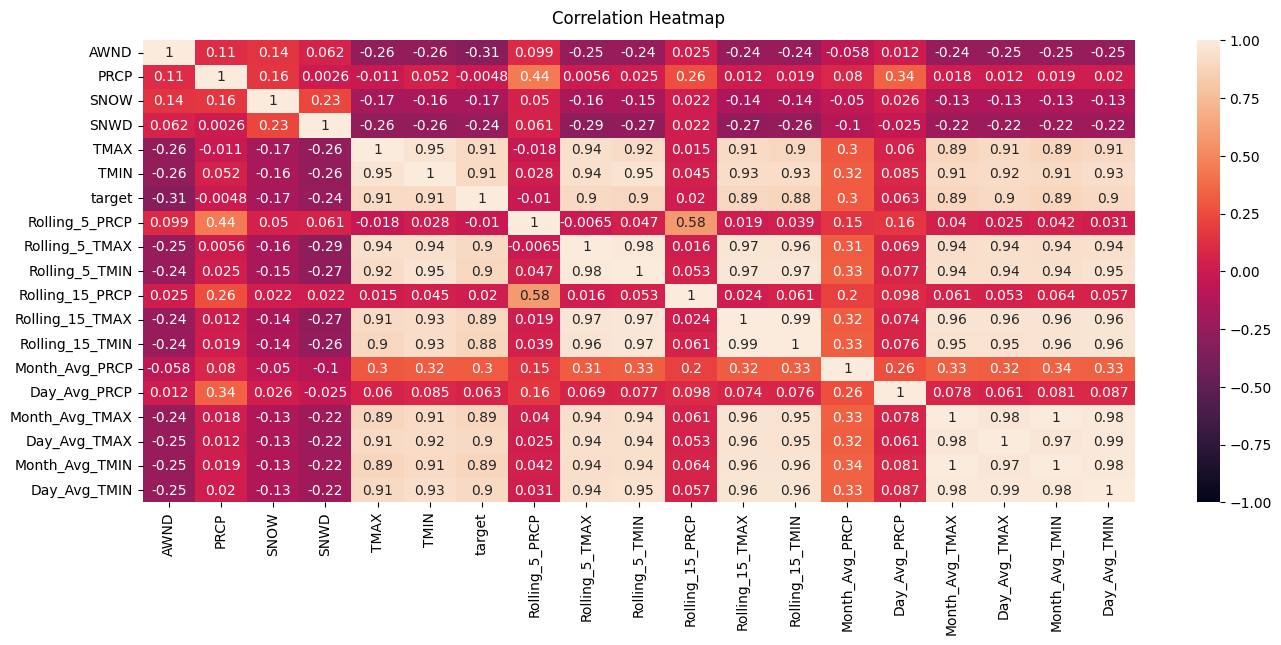

In [ ]:

numeric_df = weather_df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()


**Ridge Regression - Model 3:**


('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP'bold text, 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN')

In [ ]:
predictors_3 = weather_df.columns[~weather_df.columns.isin(["target","STATION","NAME"])]
predictors_3

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'Rolling_5_PRCP',
       'Rolling_5_TMAX', 'Rolling_5_TMIN', 'Rolling_15_PRCP',
       'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP',
       'Month_Avg_TMAX', 'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN'],
      dtype='object')

In [ ]:
predictions_3 = ridge_predictor(weather_df, model_1, predictors_3)
predictions_3

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,33.453563,3.453563
2011-01-14,36.0,33.468996,2.531004
2011-01-15,36.0,36.590515,0.590515
2011-01-16,27.0,37.710221,10.710221
2011-01-17,45.0,33.408526,11.591474
...,...,...,...
2024-04-05,55.0,51.948171,3.051829
2024-04-06,58.0,54.490033,3.509967
2024-04-07,63.0,56.973266,6.026734


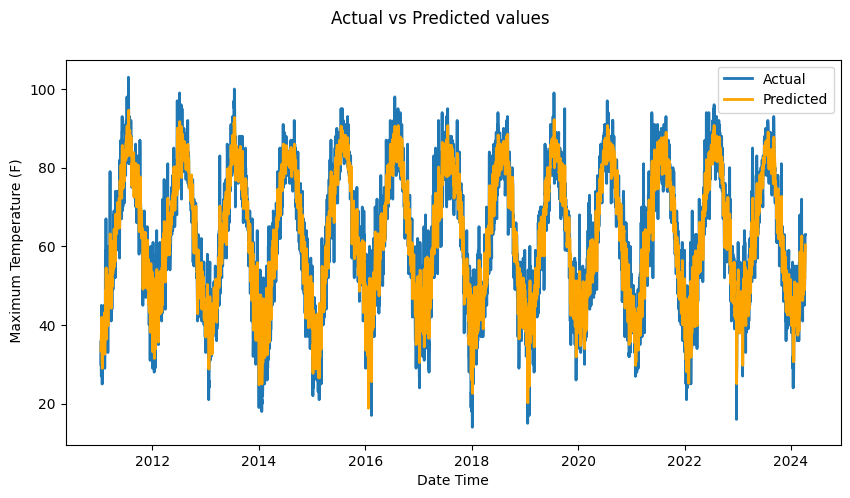

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(predictions_3)

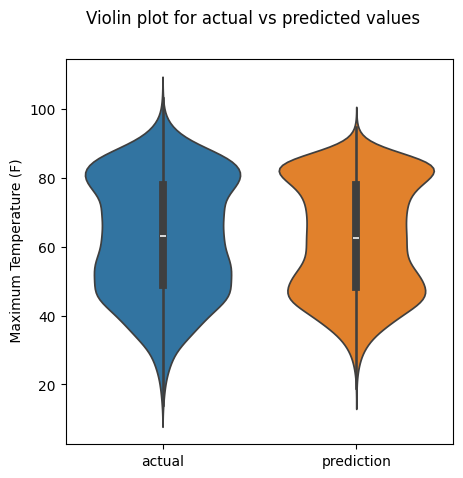

In [ ]:
violinplot(predictions_3)

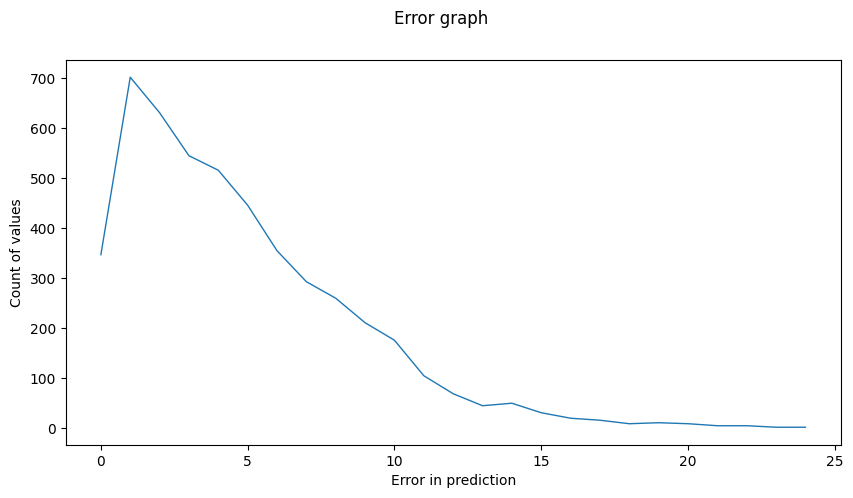

<Figure size 640x480 with 0 Axes>

In [ ]:

errorgraph(predictions_3)

In [ ]:
error = rmse_error(predictions_3['actual'],predictions_3['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.011853501725073


In [ ]:
error = r2_error(predictions_3['actual'],predictions_3['prediction'])
print("R2 score  : ", error)

R2 score  :  0.8775508462222039


In [ ]:
error = mab_error(predictions_3['actual'],predictions_3['prediction'])
print("Mean absolute error : ", error)

Mean absolute error :  4.6994895582104474


Linear Regression Model 1: ('AWND', 'PRCP', 'TMAX', 'TMIN')

In [ ]:
# Having a look at our predictors
predictors_1

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
# Calling the linear_predictor function to get the predicted values

predictions_1_linear = linear_predictor(weather_df, model_2, predictors_1)
predictions_1_linear

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,32.568647,2.568647
2011-01-14,36.0,32.392596,3.607404
2011-01-15,36.0,37.471927,1.471927
2011-01-16,27.0,39.603978,12.603978
2011-01-17,45.0,33.295653,11.704347
...,...,...,...
2024-04-05,55.0,51.024324,3.975676
2024-04-06,58.0,54.630947,3.369053
2024-04-07,63.0,56.621961,6.378039


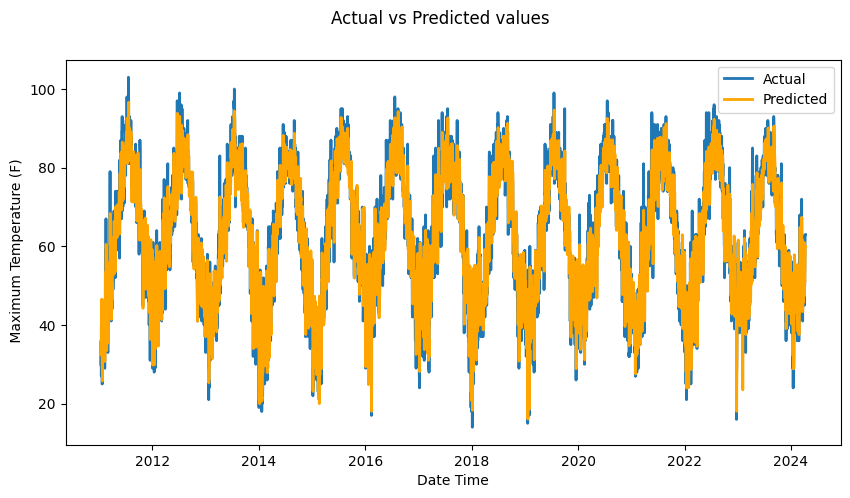

<Figure size 640x480 with 0 Axes>

In [ ]:

lineplot(predictions_1_linear)

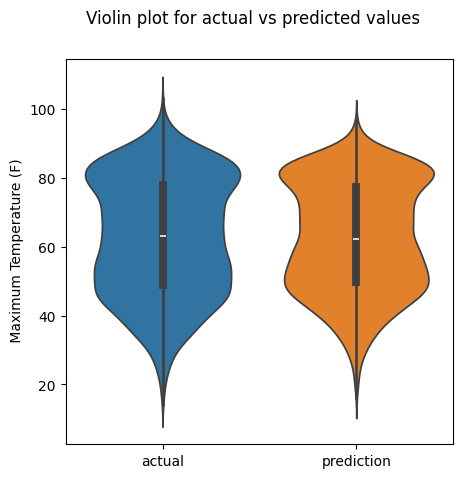

In [ ]:

violinplot(predictions_1_linear)

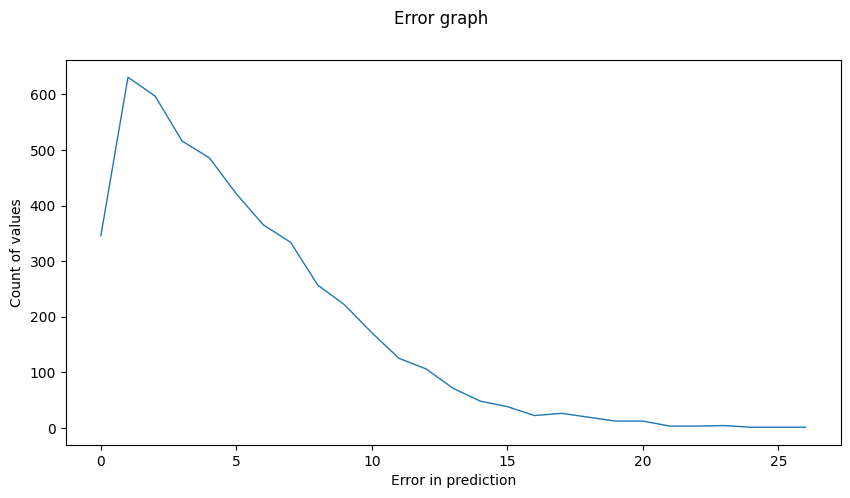

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(predictions_1_linear)

In [ ]:
# Calculating the model performance

error = rmse_error(predictions_1_linear['actual'],predictions_1_linear['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.45781105025399


In [ ]:
error = r2_error(predictions_1_linear['actual'],predictions_1_linear['prediction'])
print("R2 score: ", error)

R2 score:  0.8587105685122696


In [ ]:
error = mab_error(predictions_1_linear['actual'],predictions_1_linear['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.05203604130286


Linear Regression Model 2:

 ('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
   'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
   'Rolling_15_TMIN' )

In [ ]:
# Looking at our next set of predictors
predictors_2

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'Rolling_5_PRCP',
       'Rolling_5_TMAX', 'Rolling_5_TMIN', 'Rolling_15_PRCP',
       'Rolling_15_TMAX', 'Rolling_15_TMIN'],
      dtype='object')

In [ ]:
# Calling the linear_predictor function to get the predicted values

predictions_2_linear = linear_predictor(weather_df, model_2, predictors_2)
predictions_2_linear

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,33.180439,3.180439
2011-01-14,36.0,33.447235,2.552765
2011-01-15,36.0,36.972120,0.972120
2011-01-16,27.0,38.256795,11.256795
2011-01-17,45.0,33.158450,11.841550
...,...,...,...
2024-04-05,55.0,50.172580,4.827420
2024-04-06,58.0,53.011860,4.988140
2024-04-07,63.0,54.988995,8.011005


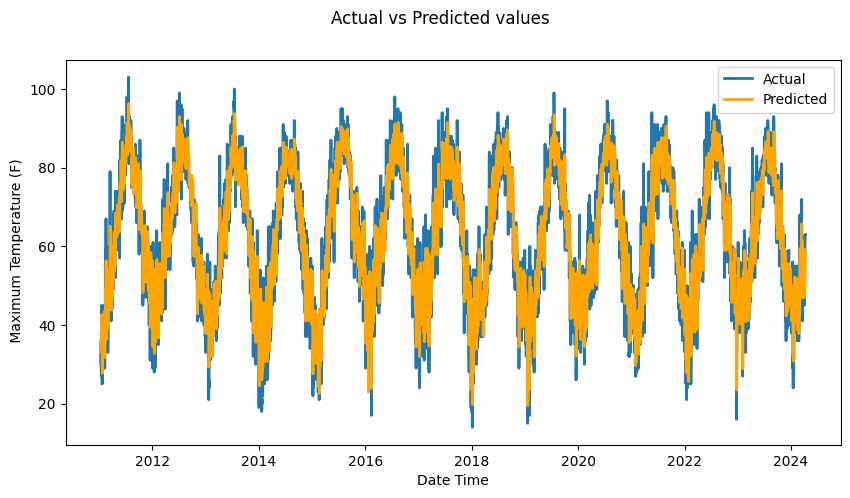

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(predictions_2_linear)

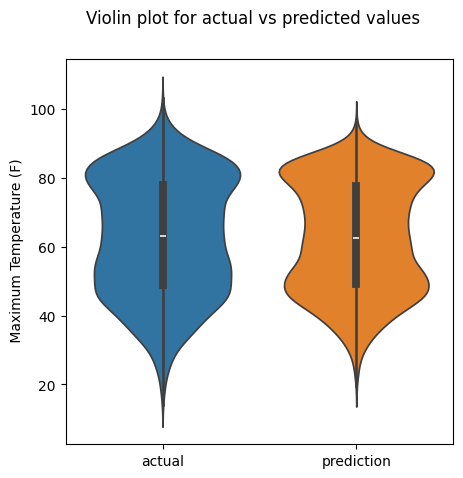

In [ ]:
violinplot(predictions_2_linear)

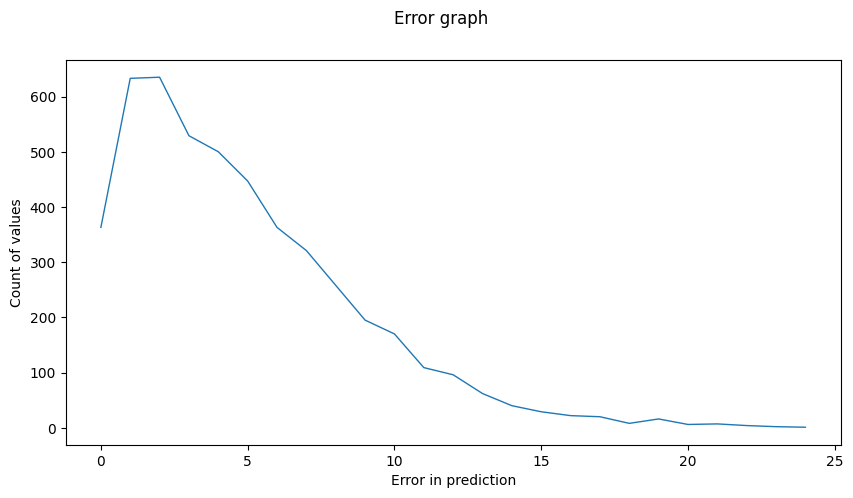

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(predictions_2_linear)

In [ ]:
# Calculating the model performance

error = rmse_error(predictions_2_linear['actual'],predictions_2_linear['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.193595787927626


In [ ]:
error = r2_error(predictions_2_linear['actual'],predictions_2_linear['prediction'])
print("R2 score: ", error)

R2 score:  0.8700355038960663


In [ ]:
error = mab_error(predictions_2_linear['actual'],predictions_2_linear['prediction'])
print("Mean absolute: ", error)

Mean absolute:  4.841810754628027


Linear Regression Model 3:


 ( 'AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
   'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
   'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX',
   'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN' )

In [ ]:
# Looking at our next set of predictors
predictors_3

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'Rolling_5_PRCP',
       'Rolling_5_TMAX', 'Rolling_5_TMIN', 'Rolling_15_PRCP',
       'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP',
       'Month_Avg_TMAX', 'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN'],
      dtype='object')

In [ ]:
# Calling the linear_predictor function to get the predicted values

predictions_3_linear = linear_predictor(weather_df, model_2, predictors_3)
predictions_3_linear

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,33.455052,3.455052
2011-01-14,36.0,33.470209,2.529791
2011-01-15,36.0,36.590989,0.590989
2011-01-16,27.0,37.710839,10.710839
2011-01-17,45.0,33.409221,11.590779
...,...,...,...
2024-04-05,55.0,51.948568,3.051432
2024-04-06,58.0,54.490349,3.509651
2024-04-07,63.0,56.976022,6.023978


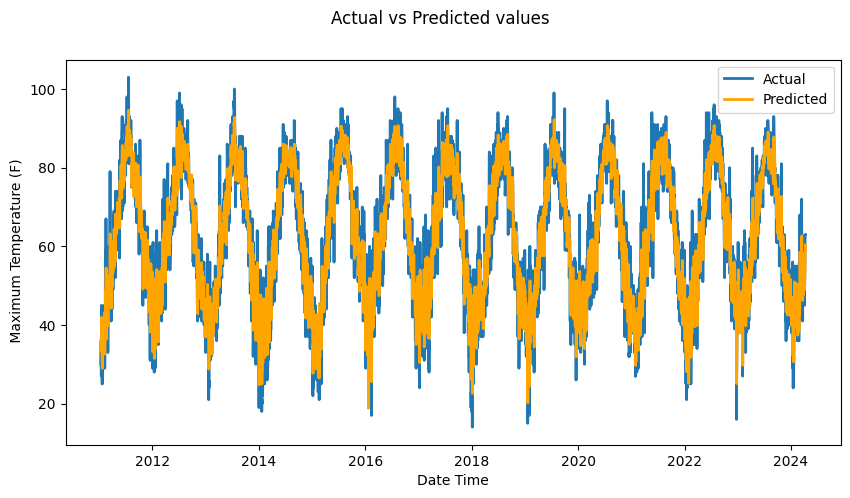

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(predictions_3_linear)

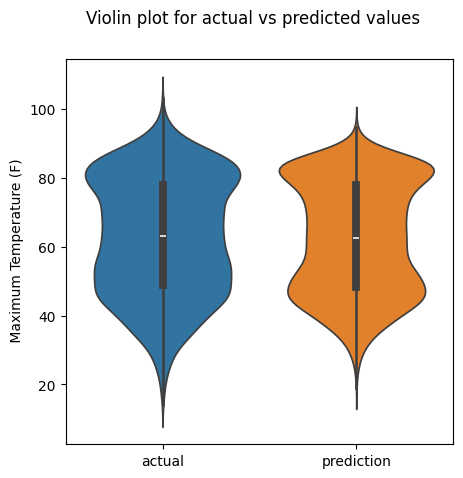

In [ ]:
violinplot(predictions_3_linear)

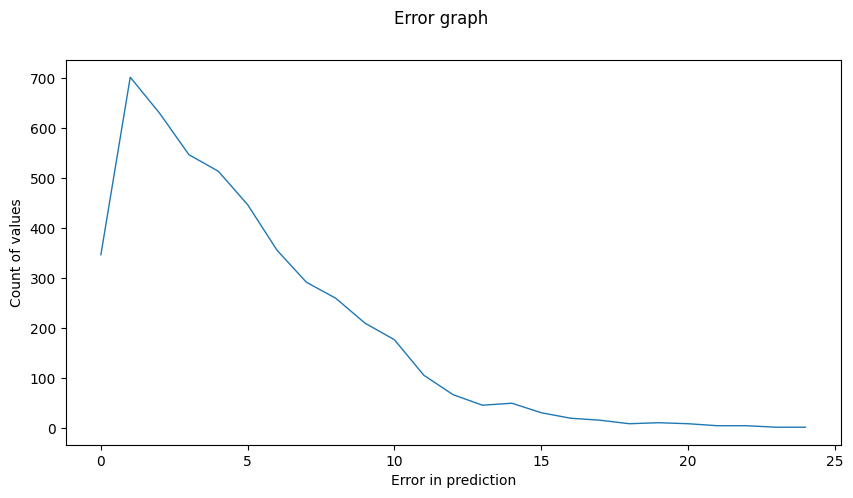

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(predictions_3_linear)

In [ ]:
# Calculating the model performance

error = rmse_error(predictions_3_linear['actual'],predictions_3_linear['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.011775015354074


In [ ]:
error = r2_error(predictions_3_linear['actual'],predictions_3_linear['prediction'])
print("R2 score: ", error)

R2 score:  0.8775540434148749


In [ ]:
error = mab_error(predictions_3_linear['actual'],predictions_3_linear['prediction'])
print("Mean absolute: ", error)

Mean absolute:  4.6994471186757725


Lasso Regression Model 1: ('AWND', 'PRCP', 'TMAX', 'TMIN')

In [ ]:
# Looking at the predictors
predictors_1

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
# Calling the lasso_predictor function to get the predicted values

predictions_1_lasso = lasso_predictor(weather_df, model_3, predictors_1)
predictions_1_lasso

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,32.082292,2.082292
2011-01-14,36.0,31.990447,4.009553
2011-01-15,36.0,37.105463,1.105463
2011-01-16,27.0,39.150710,12.150710
2011-01-17,45.0,32.907747,12.092253
...,...,...,...
2024-04-05,55.0,50.894158,4.105842
2024-04-06,58.0,54.494546,3.505454
2024-04-07,63.0,56.555977,6.444023


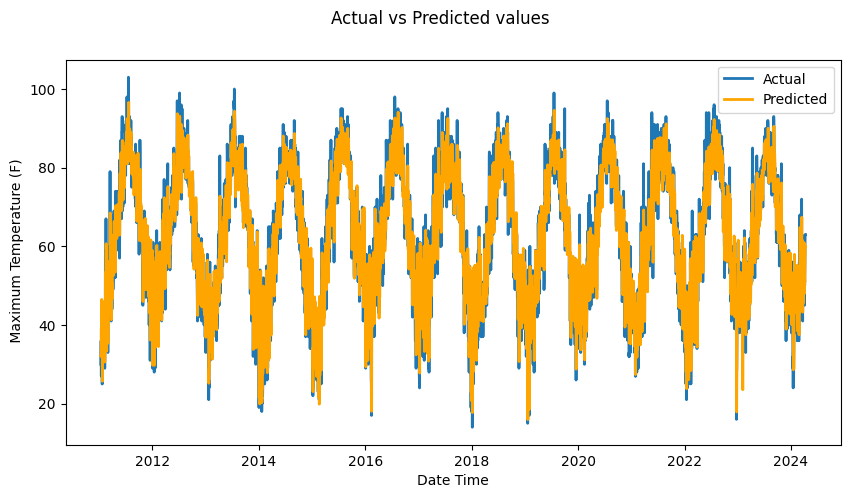

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(predictions_1_lasso)

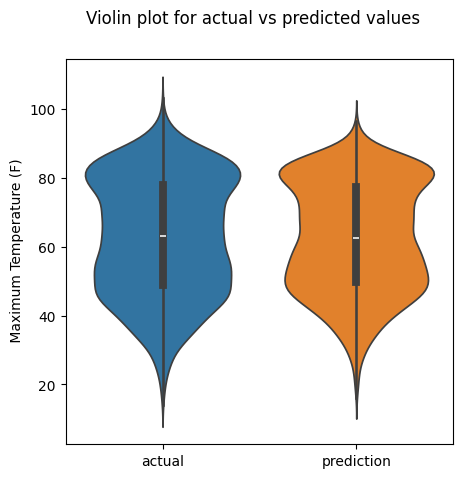

In [ ]:
violinplot(predictions_1_lasso)

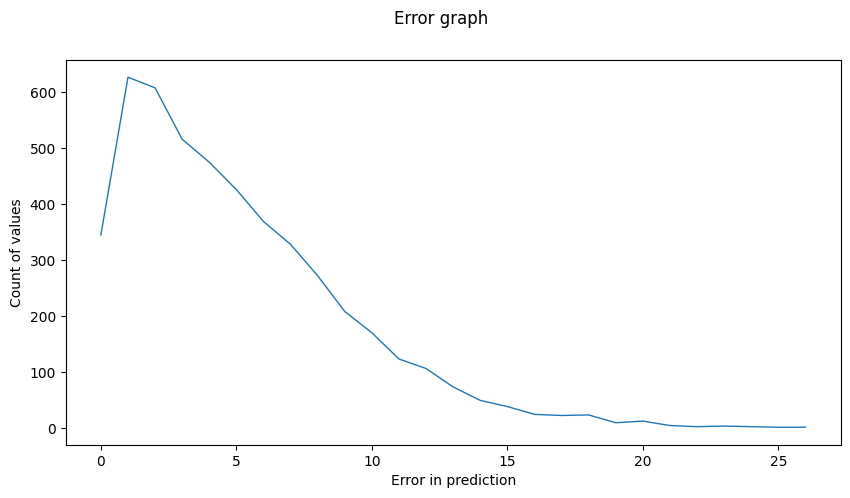

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(predictions_1_lasso)

In [ ]:
# Calculating the model performance

error = rmse_error(predictions_1_lasso['actual'],predictions_1_lasso['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.4593557485422


In [ ]:
error = r2_error(predictions_1_lasso['actual'],predictions_1_lasso['prediction'])
print("R2 score: ", error)

R2 score:  0.8586429680068546


In [ ]:
error = mab_error(predictions_1_lasso['actual'],predictions_1_lasso['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.050372411855349


**Lasso Regression Model 2:**


('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
   'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
   'Rolling_15_TMIN')

In [ ]:
# Looking at the predictors
predictors_2

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'Rolling_5_PRCP',
       'Rolling_5_TMAX', 'Rolling_5_TMIN', 'Rolling_15_PRCP',
       'Rolling_15_TMAX', 'Rolling_15_TMIN'],
      dtype='object')

In [ ]:
# Calling the lasso_predictor function to get the predicted values

predictions_2_lasso = lasso_predictor(weather_df, model_3, predictors_2)
predictions_2_lasso

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,32.892649,2.892649
2011-01-14,36.0,33.291318,2.708682
2011-01-15,36.0,36.825112,0.825112
2011-01-16,27.0,37.939354,10.939354
2011-01-17,45.0,32.885045,12.114955
...,...,...,...
2024-04-05,55.0,50.087504,4.912496
2024-04-06,58.0,52.904508,5.095492
2024-04-07,63.0,55.094839,7.905161


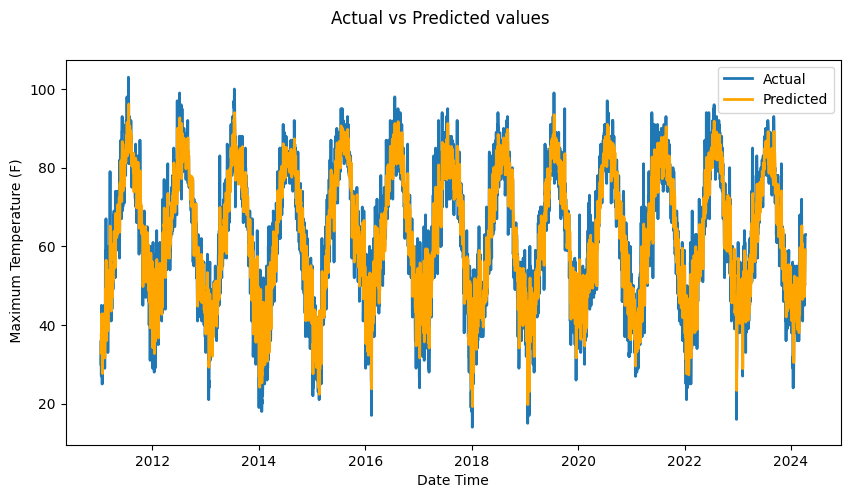

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(predictions_2_lasso)

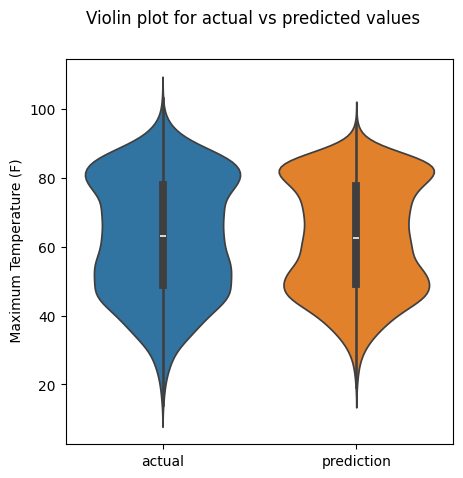

In [ ]:
violinplot(predictions_2_lasso)

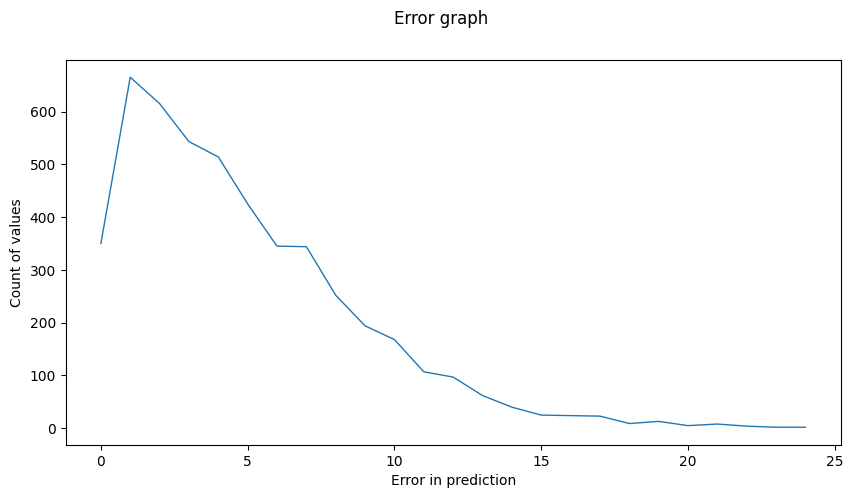

<Figure size 640x480 with 0 Axes>

In [ ]:

errorgraph(predictions_2_lasso)

In [ ]:
# Calculating the model performance

error = rmse_error(predictions_2_lasso['actual'],predictions_2_lasso['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.196039721263845


In [ ]:
error = r2_error(predictions_2_lasso['actual'],predictions_2_lasso['prediction'])
print("R2 score: ", error)

R2 score:  0.8699329181797133


In [ ]:
error = mab_error(predictions_2_lasso['actual'],predictions_2_lasso['prediction'])
print("Mean absolute: ", error)

Mean absolute:  4.83928263597234


**Lasso Regression Model 3:**


('AWND','PRCP','TMAX','TMIN', 'Rolling_5_PRCP','Rolling_5_TMAX','Rolling_5_TMIN','Rolling_15_PRCP','Rolling_15_TMAX',           'Rolling_15_TMIN','Month_Avg_PRCP','Day_Avg_PRCP','Month_Avg_TMAX','Day_Avg_TMAX','Month_Avg_TMIN','Day_Avg_TMIN')

In [ ]:
# Looking at the predictors
predictors_3

Index(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'Rolling_5_PRCP',
       'Rolling_5_TMAX', 'Rolling_5_TMIN', 'Rolling_15_PRCP',
       'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP',
       'Month_Avg_TMAX', 'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN'],
      dtype='object')

In [ ]:
# Calling the lasso_predictor function to get the predicted values

predictions_3_lasso = lasso_predictor(weather_df, model_3, predictors_3)
predictions_3_lasso

,actual,prediction,difference
DATE,,,
2011-01-13,30.0,33.224222,3.224222
2011-01-14,36.0,33.302911,2.697089
2011-01-15,36.0,36.552006,0.552006
2011-01-16,27.0,37.597927,10.597927
2011-01-17,45.0,33.259125,11.740875
...,...,...,...
2024-04-05,55.0,51.945844,3.054156
2024-04-06,58.0,54.530558,3.469442
2024-04-07,63.0,56.610568,6.389432


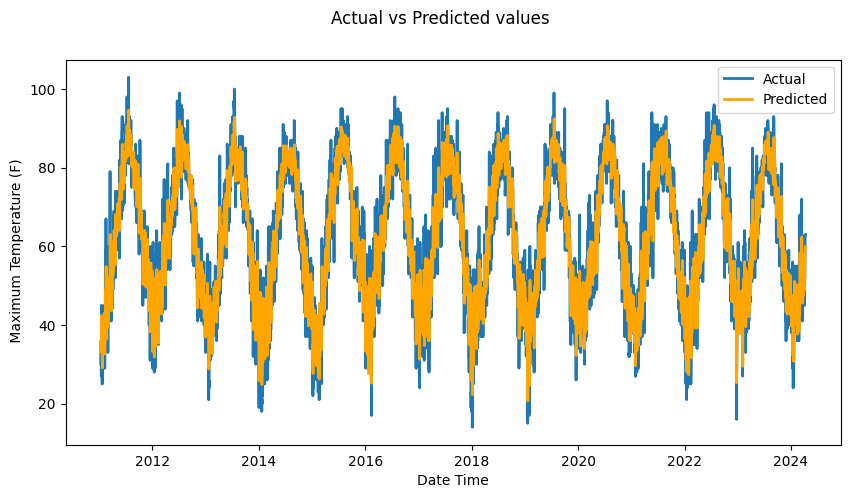

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(predictions_3_lasso)

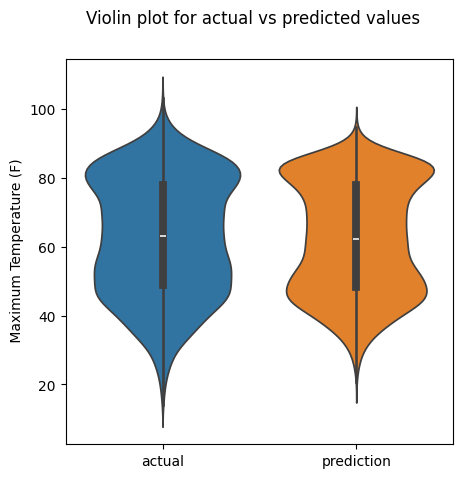

In [ ]:
violinplot(predictions_3_lasso)

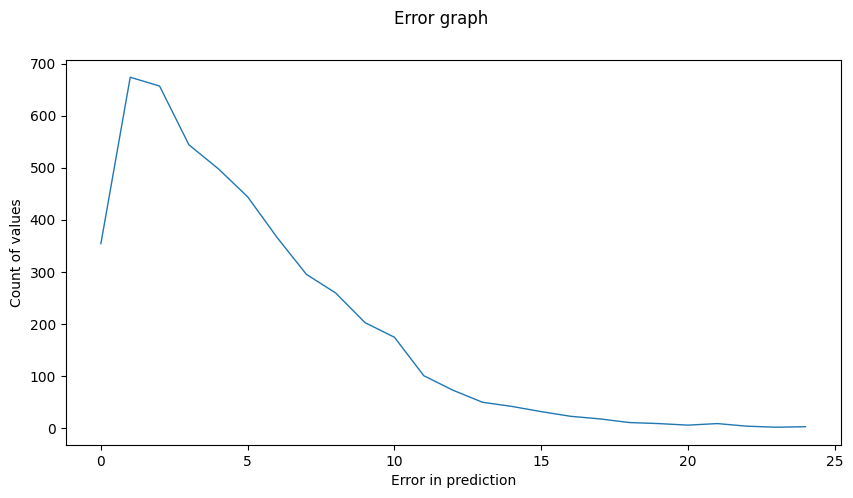

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(predictions_3_lasso)

In [ ]:
# Calculating the model performance

error = rmse_error(predictions_3_lasso['actual'],predictions_3_lasso['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.028812568116571


In [ ]:
error = r2_error(predictions_3_lasso['actual'],predictions_3_lasso['prediction'])
print("R2 score: ", error)

R2 score:  0.8768590288514706


In [ ]:
error = mab_error(predictions_3_lasso['actual'],predictions_3_lasso['prediction'])
print("Mean absolute: ", error)

Mean absolute:  4.706328070373655


Splitting the dataset for the next 2 models:

In [ ]:
train_dataset = weather_df.loc["1990-01-01" : "2020-12-31"]

In [ ]:
test_dataset = weather_df.loc["2021-01-01":]

In [ ]:
x_train = train_dataset[['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN']]
x_test = test_dataset[['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN']]

In [ ]:
y_train = train_dataset[['target']]
y_test = test_dataset[['target']]


**Elastic Regression Model:**


('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN')

In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha =1.0, l1_ratio = 0.5)

In [ ]:
enet.fit(x_train, y_train)

ElasticNet()

In [ ]:
y_pred = enet.predict(x_test)

In [ ]:
preds = pd.DataFrame(y_pred, index=x_test.index, columns = ['prediction'])

In [ ]:

preds = pd.concat([y_test['target'],preds['prediction']], axis=1)
preds.columns=["actual", "prediction"]
preds

,actual,prediction
DATE,,
2021-01-01,53.0,42.765830
2021-01-02,39.0,47.794147
2021-01-03,45.0,42.143901
2021-01-04,43.0,45.381478
2021-01-05,43.0,44.968704
...,...,...
2024-04-05,55.0,52.113902
2024-04-06,58.0,54.707500
2024-04-07,63.0,56.628051


In [ ]:
# Calculating difference column in dataset

for i in preds:
    preds['difference']=(preds["actual"]-preds["prediction"]).abs()

preds

,actual,prediction,difference
DATE,,,
2021-01-01,53.0,42.765830,10.234170
2021-01-02,39.0,47.794147,8.794147
2021-01-03,45.0,42.143901,2.856099
2021-01-04,43.0,45.381478,2.381478
2021-01-05,43.0,44.968704,1.968704
...,...,...,...
2024-04-05,55.0,52.113902,2.886098
2024-04-06,58.0,54.707500,3.292500
2024-04-07,63.0,56.628051,6.371949


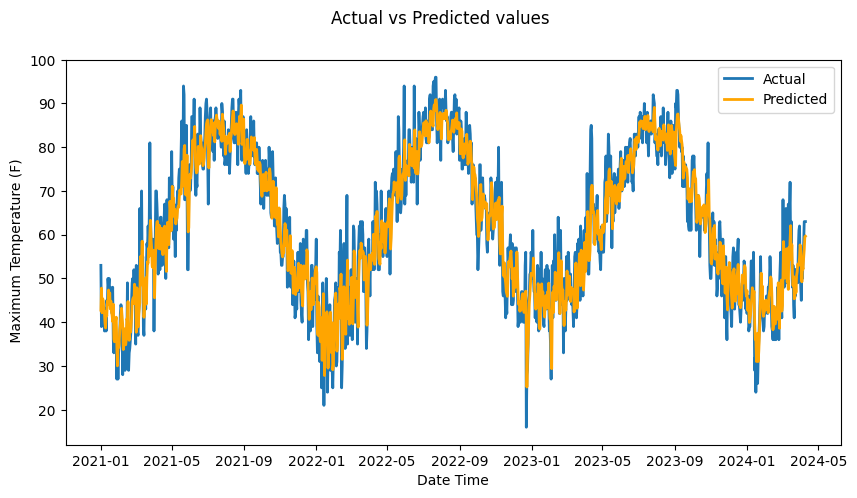

<Figure size 640x480 with 0 Axes>

In [ ]:
lineplot(preds)

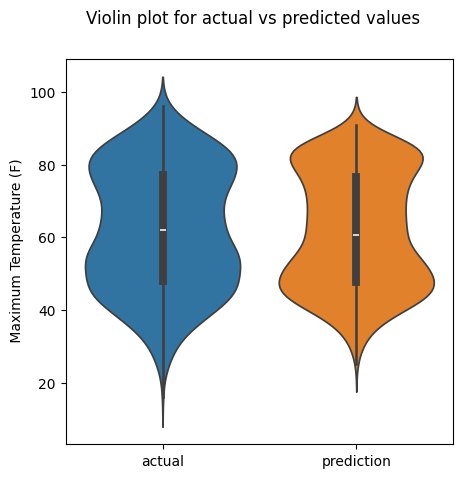

In [ ]:
violinplot(preds)

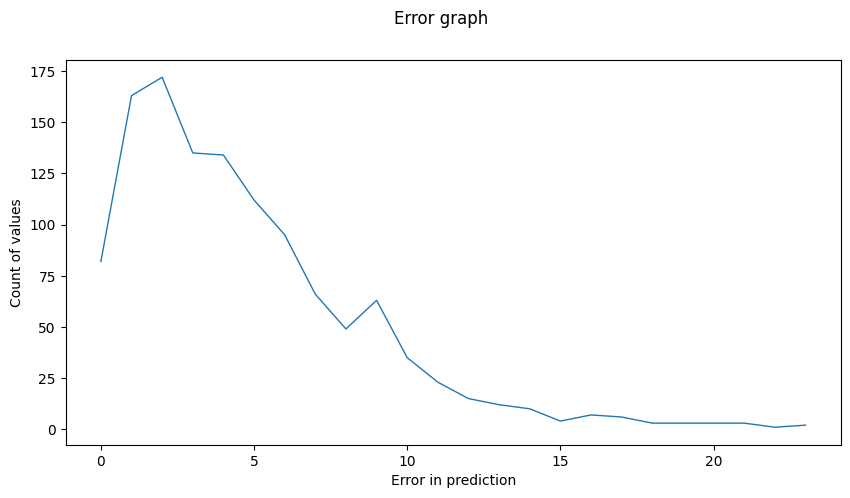

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(preds)

In [ ]:
error = rmse_error(preds['actual'],preds['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.048454673802755


In [ ]:
error = r2_error(preds['actual'],preds['prediction'])
print("R2 score: ", error)

R2 score:  0.8701940693331782


In [ ]:
error = mab_error(preds['actual'],preds['prediction'])
print("Mean absolute: ", error)

Mean absolute:  4.698264342448


**Random Forest Regressor Model :**


('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 200 , random_state = 50)
rf.fit(x_train, y_train)

<ipython-input-78-ac501dbda440>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=50)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
preds_rf = pd.DataFrame(y_pred_rf, index=x_test.index, columns = ['prediction'])
preds_rf = pd.concat([y_test['target'],preds_rf['prediction']], axis=1)
preds_rf.columns=["actual", "prediction"]
preds_rf

,actual,prediction
DATE,,
2021-01-01,53.0,43.910
2021-01-02,39.0,46.930
2021-01-03,45.0,41.700
2021-01-04,43.0,45.240
2021-01-05,43.0,44.415
...,...,...
2024-04-05,55.0,54.215
2024-04-06,58.0,57.680
2024-04-07,63.0,58.710


In [ ]:
# Calculating difference column in dataset

for i in preds:
    preds_rf['difference']=(preds_rf["actual"]-preds_rf["prediction"]).abs()

preds_rf

,actual,prediction,difference
DATE,,,
2021-01-01,53.0,43.910,9.090
2021-01-02,39.0,46.930,7.930
2021-01-03,45.0,41.700,3.300
2021-01-04,43.0,45.240,2.240
2021-01-05,43.0,44.415,1.415
...,...,...,...
2024-04-05,55.0,54.215,0.785
2024-04-06,58.0,57.680,0.320
2024-04-07,63.0,58.710,4.290


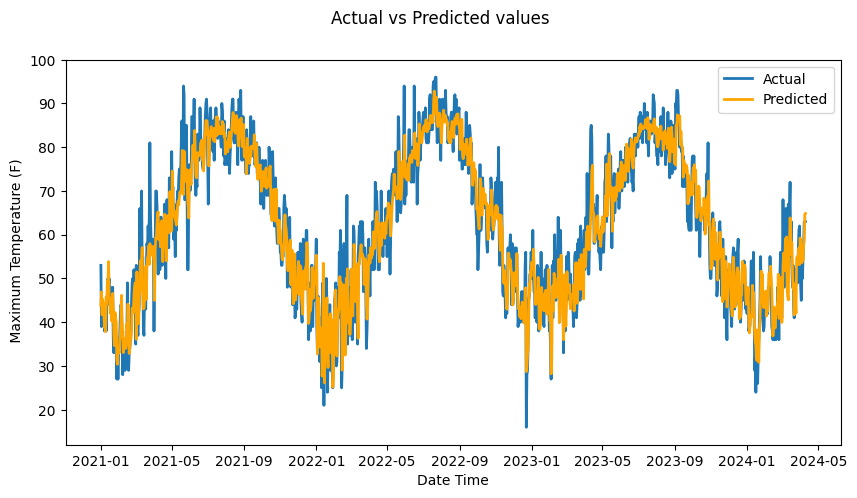

<Figure size 640x480 with 0 Axes>

In [ ]:

lineplot(preds_rf)

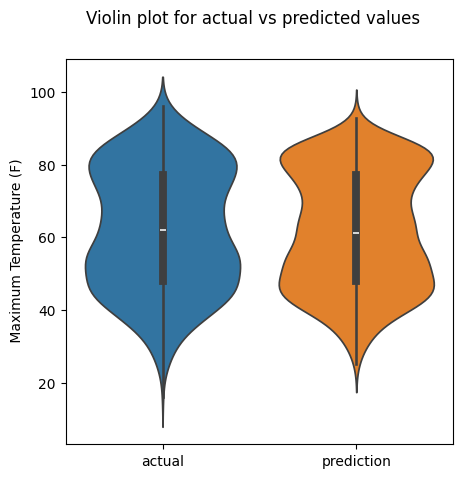

In [ ]:
violinplot(preds_rf)

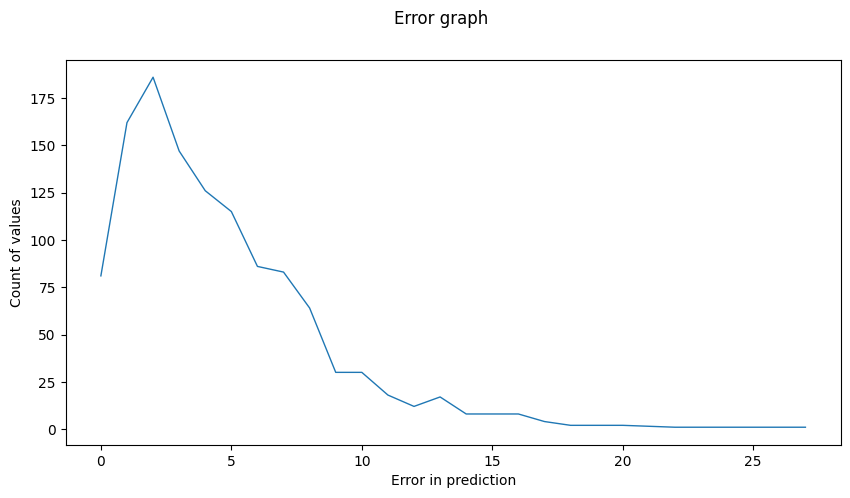

<Figure size 640x480 with 0 Axes>

In [ ]:
errorgraph(preds_rf)

In [ ]:
error = rmse_error(preds_rf['actual'],preds_rf['prediction'])
print("Root mean square error : ", error)


Root mean square error :  5.893453463280199


In [ ]:

error = r2_error(preds_rf['actual'],preds_rf['prediction'])
print("R2 score: ", error)

R2 score:  0.8767617872310831


In [ ]:
error = mab_error(preds_rf['actual'],preds_rf['prediction'])
print("Mean absolute: ", error)

Mean absolute:  4.542209205020921
